### Group: BD-2008
### Students: Amir Yakubov, Omirzhan Zhanibek
### Topic: Credit Risk Prediction

#### Attribute description:
- id: identifier
- income: income of person
- age: person's age
- experience: work experience in life
- married: marital status
- house_ownership: own house or rented
- car_ownership: own car or not
- profession: person's profession	
- city: what city does the person live in
- state: what state does the person live in
- current_job_years: how many years have person been working in current location
- current_house_years: how many years have person been living in current house
- risk_flag: risk for credit; 1-Yes, 0-No

## 1. Descriptive statistics.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Data.csv')
data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
data.shape

(252000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
data.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
data.nunique()

Id                     252000
income                  41917
age                        59
experience                 21
married                     2
house_ownership             3
car_ownership               2
profession                 51
city                      317
state                      29
current_job_years          15
current_house_years         5
risk_flag                   2
dtype: int64

In [7]:
data.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

## 2. Data Preprocessing

In [8]:
data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [9]:
# create new column
data['location'] = data.city + ', ' + data.state

In [10]:
# remove columns we don't want to use
data.drop(['Id','city','state'], axis=1, inplace=True)

In [11]:
data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag,location
0,1303835,23,3,single,rented,no,Mechanical_engineer,3,13,0,"Rewa, Madhya_Pradesh"
1,7574516,40,10,single,rented,no,Software_Developer,9,13,0,"Parbhani, Maharashtra"
2,3991815,66,4,married,rented,no,Technical_writer,4,10,0,"Alappuzha, Kerala"
3,6256451,41,2,single,rented,yes,Software_Developer,2,12,1,"Bhubaneswar, Odisha"
4,5768871,47,11,single,rented,no,Civil_servant,3,14,1,"Tiruchirappalli[10], Tamil_Nadu"


In [12]:
data.shape

(252000, 11)

In [13]:
data.isnull().sum()

income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
current_job_years      0
current_house_years    0
risk_flag              0
location               0
dtype: int64

In [14]:
def remove_outlier_IQR(data):
    num_columns = [x for x in data.columns if data[x].dtype !=object]
    reduced_df=data[num_columns]
    Q1=reduced_df.quantile(0.25)
    Q3=reduced_df.quantile(0.75)
    IQR=Q3-Q1
    df_final_index=reduced_df[((reduced_df<(Q1-1.5*IQR)) | (reduced_df>(Q3+1.5*IQR)))].index
    return data.loc[df_final_index.values]

In [15]:
data = remove_outlier_IQR(data)
data.shape

(252000, 11)

**count for factorizing**

In [16]:
data.married.value_counts()

single     226272
married     25728
Name: married, dtype: int64

In [17]:
data.house_ownership.value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

In [18]:
# factorizing
data['married'] = data.apply(lambda x: 1 if x['married'] == 'married' else 0, axis = 1)
data['car_ownership'] = data.apply(lambda x: 1 if x['car_ownership'] == 'yes' else 0, axis = 1)
data['house_ownership'] = data.house_ownership.factorize(sort=True)[0]

In [19]:
data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag,location
0,1303835,23,3,0,2,0,Mechanical_engineer,3,13,0,"Rewa, Madhya_Pradesh"
1,7574516,40,10,0,2,0,Software_Developer,9,13,0,"Parbhani, Maharashtra"
2,3991815,66,4,1,2,0,Technical_writer,4,10,0,"Alappuzha, Kerala"
3,6256451,41,2,0,2,1,Software_Developer,2,12,1,"Bhubaneswar, Odisha"
4,5768871,47,11,0,2,0,Civil_servant,3,14,1,"Tiruchirappalli[10], Tamil_Nadu"


## 3. Data Visualization.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag,location
0,1303835,23,3,0,2,0,Mechanical_engineer,3,13,0,"Rewa, Madhya_Pradesh"
1,7574516,40,10,0,2,0,Software_Developer,9,13,0,"Parbhani, Maharashtra"
2,3991815,66,4,1,2,0,Technical_writer,4,10,0,"Alappuzha, Kerala"
3,6256451,41,2,0,2,1,Software_Developer,2,12,1,"Bhubaneswar, Odisha"
4,5768871,47,11,0,2,0,Civil_servant,3,14,1,"Tiruchirappalli[10], Tamil_Nadu"


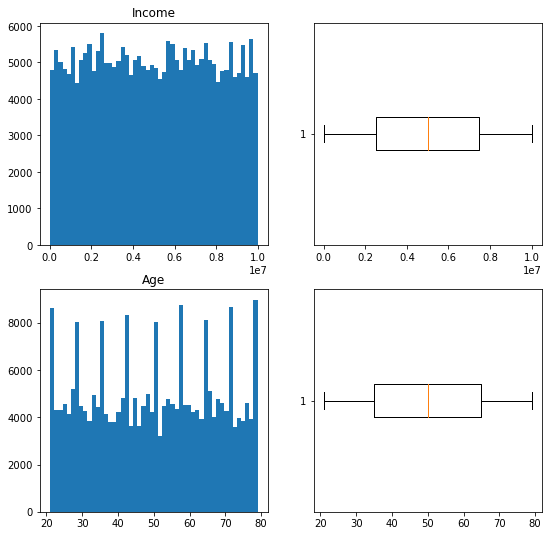

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(9,9))

ax[0][0].set_title('Income')
# ax[0][1].set_title('Income')
ax[1][0].set_title('Age')
# ax[1][1].set_title('Age')

ax[0][0].hist(data.income, 50);
ax[0][1].boxplot(data.income, vert=False)
ax[1][0].hist(data.age, 50);
ax[1][1].boxplot(data.age, vert=False);

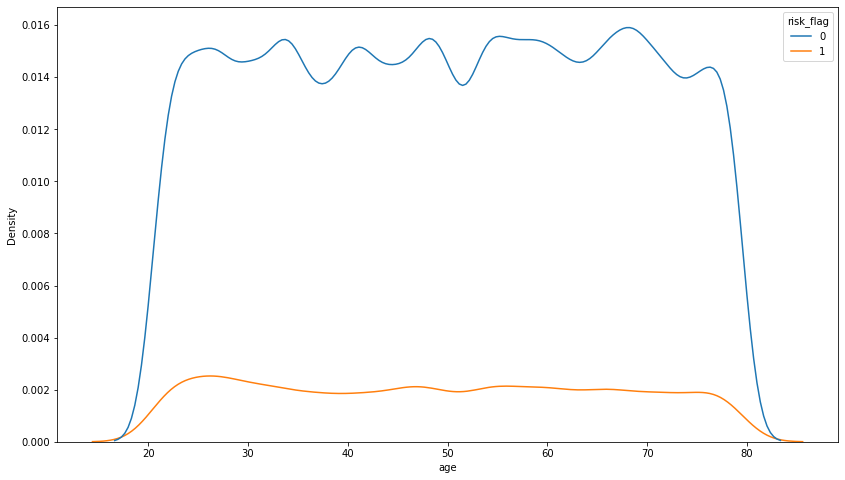

In [23]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = data , x = 'age' ,hue='risk_flag')
plt.show() 

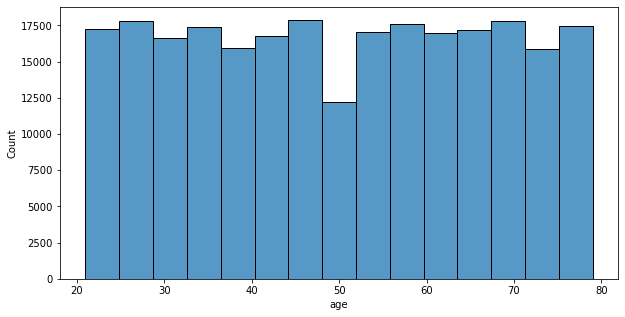

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x= 'age', bins=15)
plt.show()

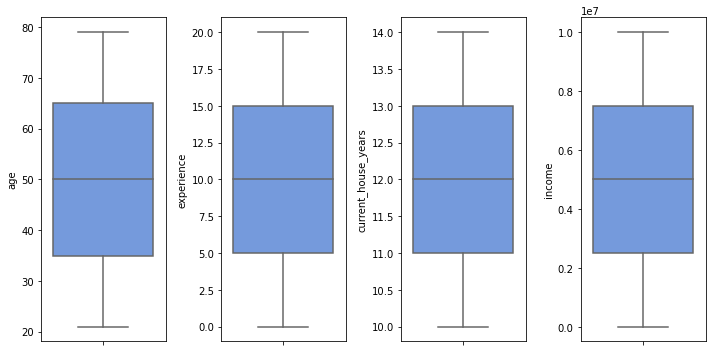

In [25]:
features = ['age','experience','current_house_years','income']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=data[features[i]], color='CornflowerBlue', orient='v')
    plt.tight_layout()

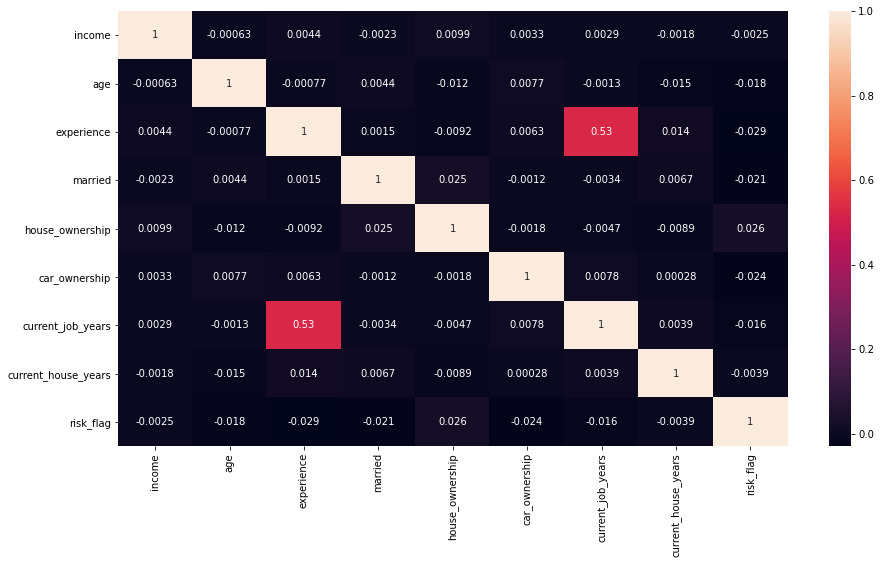

In [26]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns;

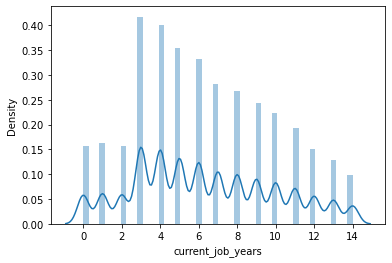

In [27]:
sns.distplot(data['current_job_years']);

In [28]:
data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag,location
0,1303835,23,3,0,2,0,Mechanical_engineer,3,13,0,"Rewa, Madhya_Pradesh"
1,7574516,40,10,0,2,0,Software_Developer,9,13,0,"Parbhani, Maharashtra"
2,3991815,66,4,1,2,0,Technical_writer,4,10,0,"Alappuzha, Kerala"
3,6256451,41,2,0,2,1,Software_Developer,2,12,1,"Bhubaneswar, Odisha"
4,5768871,47,11,0,2,0,Civil_servant,3,14,1,"Tiruchirappalli[10], Tamil_Nadu"


## 4. Model Building.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model as skl_lm

In [30]:
data.drop(['profession','location'], axis=1, inplace=True)

In [31]:
data.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [32]:
# handling imbalance data
data = data.sample(frac=1)

risky = data.loc[data['risk_flag'] == 1]
not_risky = data.loc[data['risk_flag'] == 0][:30996]

normal_df = pd.concat([risky, not_risky])
data = normal_df.sample(frac=1, random_state=2021)

data.head()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
94552,3098010,77,15,0,2,1,14,10,0
236646,8463541,70,19,0,2,0,6,13,1
23202,7532651,49,15,1,2,0,9,12,0
214267,6569934,72,9,0,2,1,3,14,1
107532,1857913,64,16,0,1,1,6,11,0


In [33]:
y = data['risk_flag']
data.drop('risk_flag' ,axis = 1 , inplace=True)
num_cols = [x for x in data.columns if data[x].dtype != 'object']
Scaler = StandardScaler()
data[num_cols] = Scaler.fit_transform(data[num_cols])

In [34]:
data.head()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years
94552,-0.658205,1.598214,0.851586,-0.323653,0.259094,1.567809,2.090822,-1.423359
236646,1.193517,1.191011,1.513471,-0.323653,0.259094,-0.637833,-0.073144,0.716062
23202,0.872253,-0.030597,0.851586,3.089732,0.259094,-0.637833,0.738344,0.002922
214267,0.540006,1.307355,-0.141243,-0.323653,0.259094,1.567809,-0.884631,1.429202
107532,-1.086180,0.841980,1.017057,-0.323653,-2.426818,1.567809,-0.073144,-0.710218


In [35]:
X_train, X_test, y_train, y_test = train_test_split(data , y, test_size=0.2 ,shuffle=True, random_state=41)

In [36]:
# logisitic regression
clf = skl_lm.LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5381079119283814


### Decision Trees

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(83.44037965812545, 214.78829268292682, 'current_job_years <= -1.02\ngini = 0.5\nsamples = 49593\nvalue = [24772, 24821]'),
 Text(13.166650052193825, 209.48487804878047, 'age <= -1.049\ngini = 0.491\nsamples = 7486\nvalue = [3237, 4249]'),
 Text(5.280669587213356, 204.18146341463415, 'income <= 0.04\ngini = 0.455\nsamples = 1669\nvalue = [583, 1086]'),
 Text(3.649903707184616, 198.8780487804878, 'income <= -0.536\ngini = 0.484\nsamples = 770\nvalue = [317, 453]'),
 Text(2.4776545035090356, 193.57463414634145, 'experience <= -1.382\ngini = 0.44\nsamples = 584\nvalue = [191, 393]'),
 Text(1.3917982431739817, 188.2712195121951, 'current_house_years <= -0.354\ngini = 0.383\nsamples = 469\nvalue = [121, 348]'),
 Text(0.3741052225387923, 182.96780487804878, 'income <= -0.579\ngini = 0.26\nsamples = 208\nvalue = [32, 176]'),
 Text(0.32337909066912557, 177.66439024390243, 'income <= -1.578\ngini = 0.243\nsamples = 205\nvalue = [29, 176]'),
 Text(0.10145226373933351, 172.3609756097561, 'cu

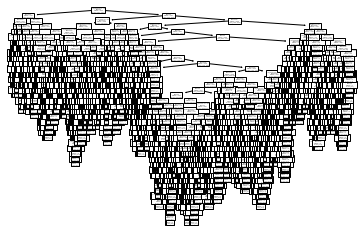

In [81]:
from sklearn.tree import plot_tree 
%matplotlib inline

plot_tree(model, feature_names = X_train.columns)

### K Nearest Neighbours

In [71]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Evaluating the algorithm
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[4252 1972]
 [ 923 5252]]
              precision    recall  f1-score   support

           0       0.82      0.68      0.75      6224
           1       0.73      0.85      0.78      6175

    accuracy                           0.77     12399
   macro avg       0.77      0.77      0.76     12399
weighted avg       0.77      0.77      0.76     12399

Accuracy Score: 0.7665134285022985


In [72]:
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))

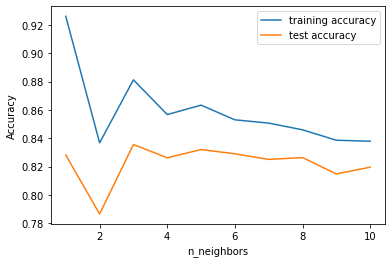

In [73]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### Random Forest

In [74]:
# Training the algorithm
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# Evaluating the algorithm
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

[[5427  797]
 [1019 5156]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      6224
           1       0.87      0.83      0.85      6175

    accuracy                           0.85     12399
   macro avg       0.85      0.85      0.85     12399
weighted avg       0.85      0.85      0.85     12399

Accuracy Score: 0.8535365755302847


In [75]:
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.957
Accuracy on test set: 0.854


In [44]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [76]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=forest,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [77]:
%%time

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 3min 17s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [78]:
rf_best = grid_search.best_estimator_

In [79]:
grid_search.best_score_

0.8368116478256752

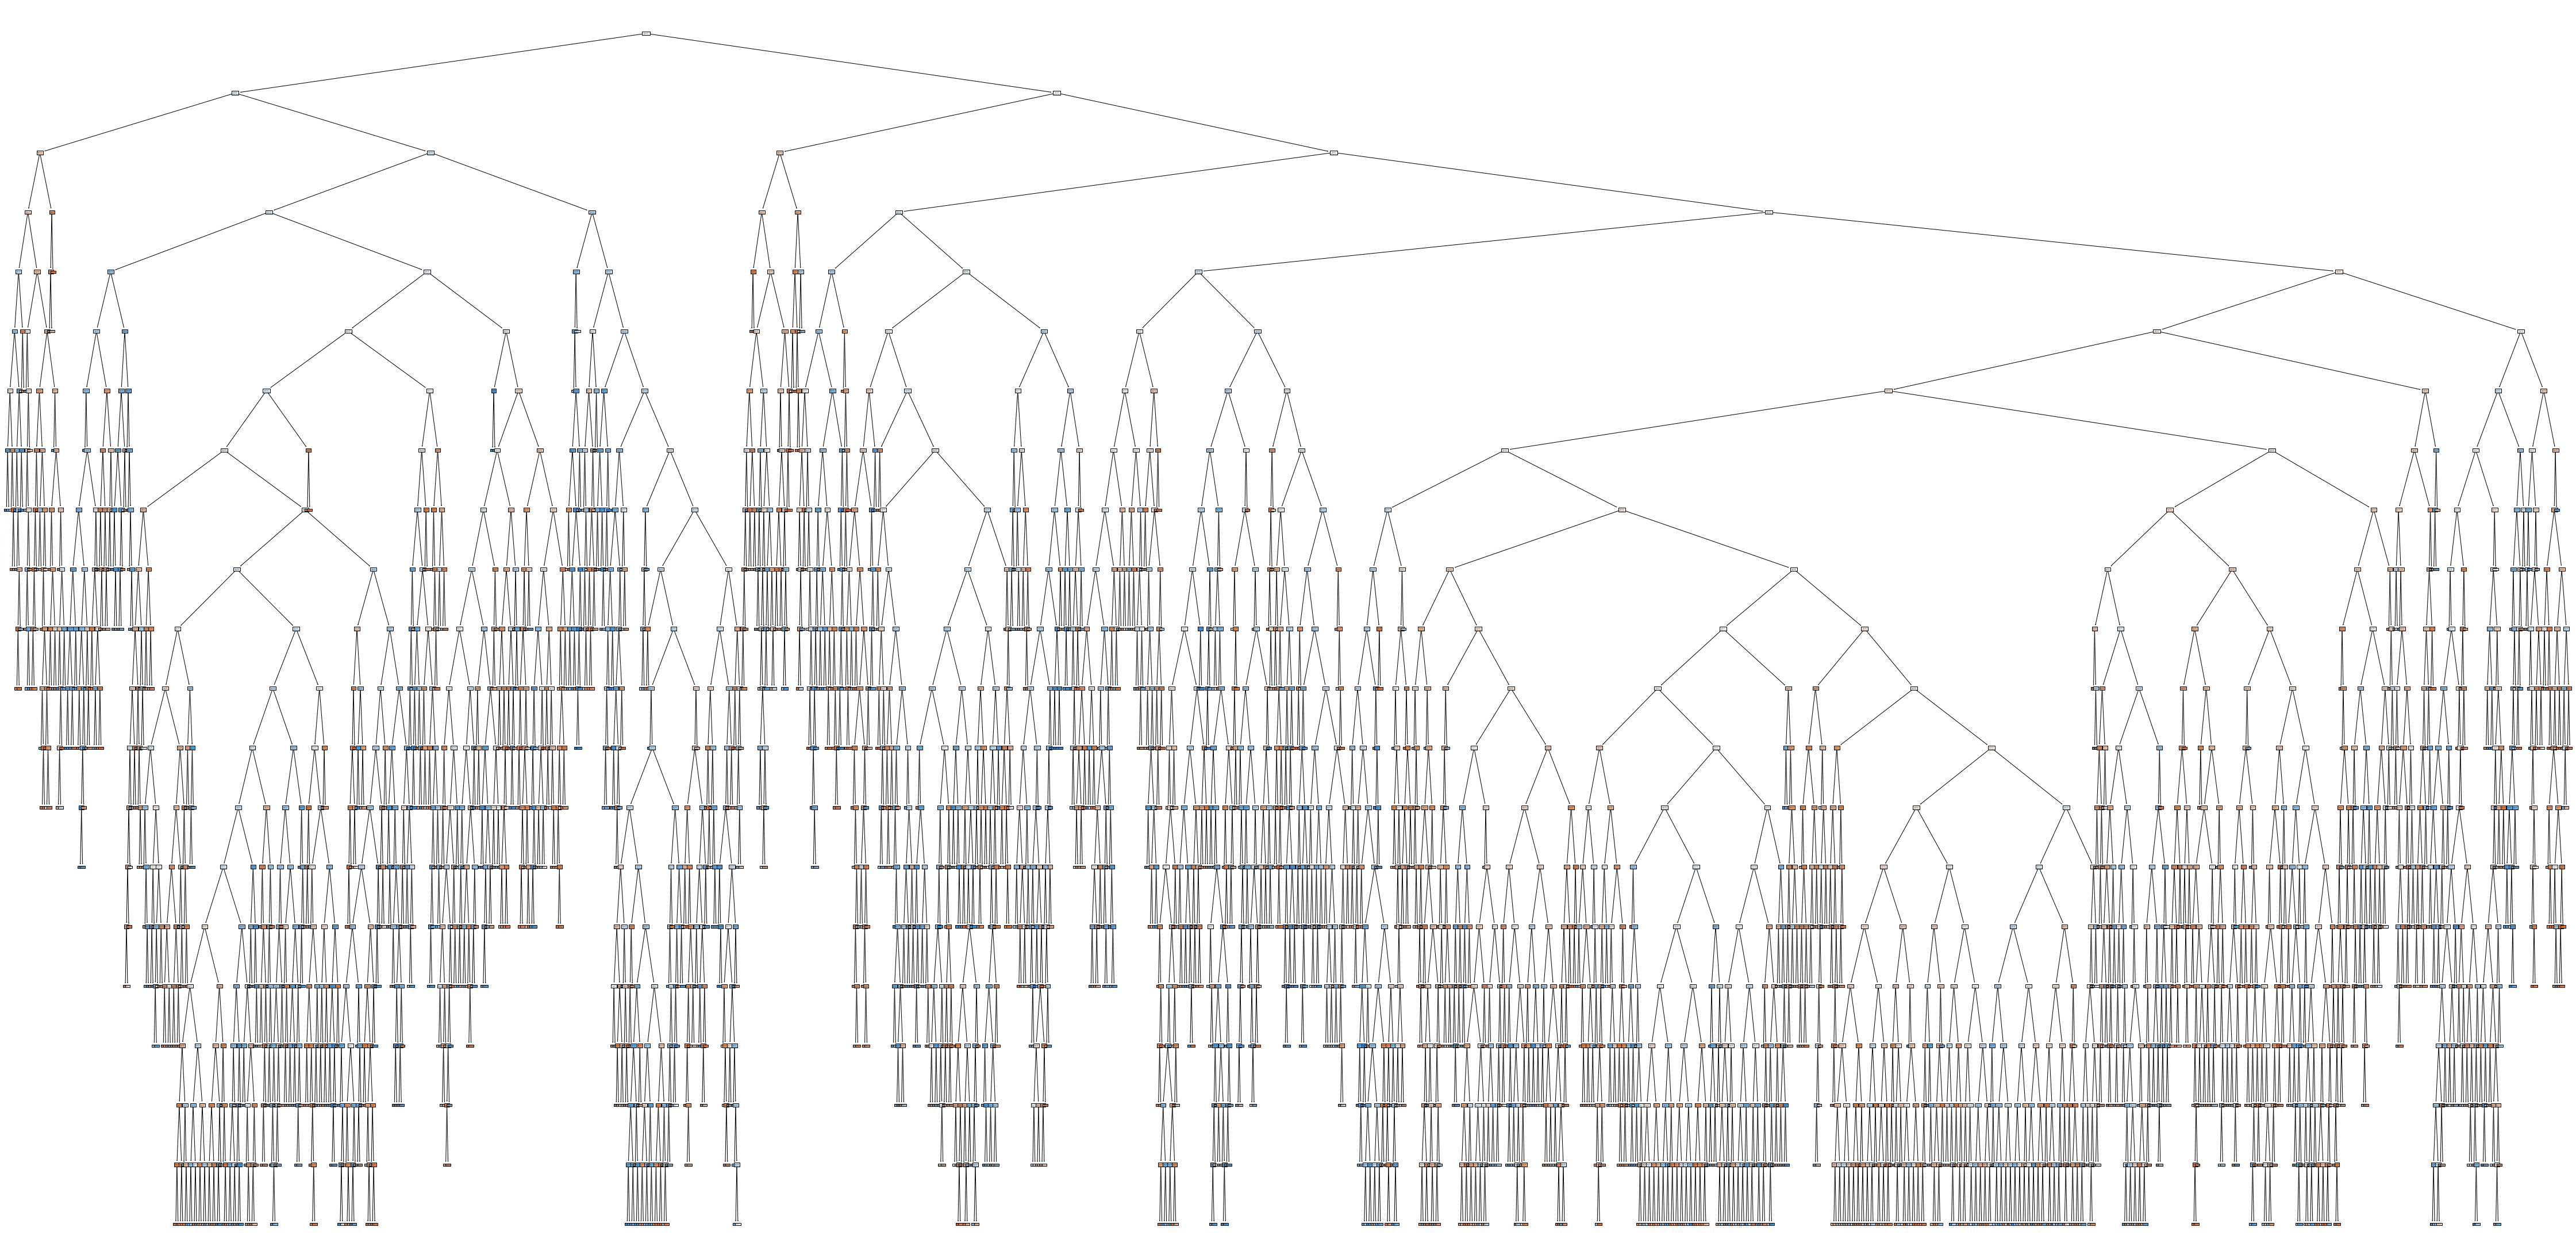

In [80]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))

plot_tree(rf_best.estimators_[5], filled=True);

## 5. Analyze models, Result comparison, ROC/AUC, precision and recall curves, deep analyzing.

In [46]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

In [47]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
svc = SVC(probability=True)
nb = GaussianNB()

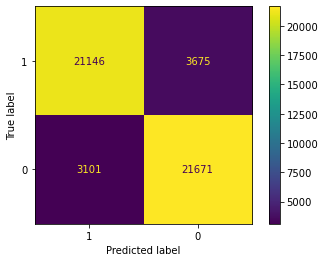

In [48]:
knn.fit(X_train, y_train)
plot_confusion_matrix(knn, X_train, y_train, labels = [1, 0])  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data , y, test_size=0.2 ,shuffle=True, random_state=41)

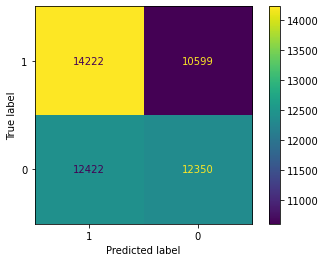

In [50]:
lr.fit(X_train, y_train)
plot_confusion_matrix(lr, X_train, y_train, labels = [1, 0])  

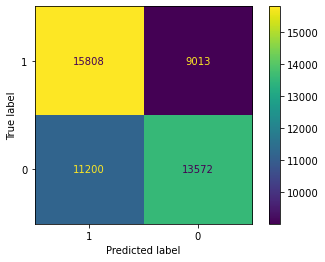

In [51]:
svc.fit(X_train, y_train)
plot_confusion_matrix(svc, X_train, y_train, labels = [1, 0])  

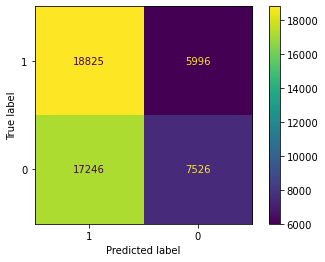

In [52]:
nb.fit(X_train,y_train)
plot_confusion_matrix(nb, X_train, y_train, labels = [1, 0])  

In [53]:
print('Accuracy score for K neighbors classifier: {:.4f}'.format(accuracy_score(y_train, knn.predict(X_train))))
print('Accuracy score for Logistic Regression: {:.4f}'.format(accuracy_score(y_train, lr.predict(X_train))))
print('Accuracy score for SVM: {:.4f}'.format(accuracy_score(y_train, svc.predict(X_train))))
print('Accuracy score for Naive Bayes: {:.4f}'.format(accuracy_score(y_train, nb.predict(X_train))))

Accuracy score for K neighbors classifier: 0.8634
Accuracy score for Logistic Regression: 0.5358
Accuracy score for SVM: 0.5924
Accuracy score for Naive Bayes: 0.5313


In [54]:
models = pd.DataFrame({'model':['KNN', 'Logistic Regression', 'SVM', 'Naive Bayes'], 
                        'Accuracy':[accuracy_score(y_train, knn.predict(X_train)), 
                                    accuracy_score(y_train, lr.predict(X_train)),
                                    accuracy_score(y_train, svc.predict(X_train)),
                                    accuracy_score(y_train, nb.predict(X_train))]})

In [55]:
# Positive Predictive Value
pred_knn = knn.predict(X_train)
pred_lr = lr.predict(X_train)
pred_svc = svc.predict(X_train)
pred_nb = nb.predict(X_train)

TP_knn, FN_knn, FP_knn, TN_knn = confusion_matrix(y_train, pred_knn).ravel()
TP_lr, FN_lr, FP_lr, TN_lr = confusion_matrix(y_train, pred_lr).ravel()
TP_svc, FN_svc, FP_svc, TN_svc = confusion_matrix(y_train, pred_svc).ravel()
TP_nb, FN_nb, FP_nb, TN_nb = confusion_matrix(y_train, pred_nb).ravel()

PPV_knn = TP_knn / (FP_knn + TP_knn)
PPV_lr = TP_lr / (FP_lr + TP_lr)
PPV_svc = TP_svc / (FP_svc + TP_svc)
PPV_nb = TP_nb / (FP_nb + TP_nb)

models['PPV'] = [PPV_knn, PPV_lr, PPV_svc, PPV_nb]

In [56]:
# True Positive Rate
TPR_knn = TP_knn / (FN_knn + TP_knn)
TPR_lr = TP_lr / (FN_lr + TP_lr)
TPR_svc = TP_svc / (FN_svc + TP_svc)
TPR_nb = TP_nb / (FN_nb + TP_nb)

models['TPR'] = [TPR_knn, TPR_lr, TPR_svc, TPR_nb]

In [57]:
# F1 score
F1_knn = 2*(PPV_knn*TPR_knn)/(PPV_knn+TPR_knn)
F1_lr = 2*(PPV_lr*TPR_lr)/(PPV_lr+TPR_lr)
F1_svc = 2*(PPV_svc*TPR_svc)/(PPV_svc+TPR_svc)
F1_nb = 2*(PPV_nb*TPR_nb)/(PPV_nb+TPR_nb)

models['F1'] = [f1_score(y_train, pred_knn, pos_label=0), f1_score(y_train, pred_lr, pos_label=0),
                f1_score(y_train, pred_svc, pos_label=0), f1_score(y_train, pred_nb, pos_label=0)]
models

,model,Accuracy,PPV,TPR,F1
0,KNN,0.863368,0.855007,0.874818,0.864799
1,Logistic Regression,0.535801,0.538150,0.498547,0.517592
2,SVM,0.592422,0.600930,0.547877,0.573178
3,Naive Bayes,0.531345,0.556574,0.303811,0.393064


In [58]:
pred_knn = knn.predict_proba(X_train)[:, 1]
pred_lr = lr.predict_proba(X_train)[:, 1]
pred_svc = svc.predict_proba(X_train)[:, 1]
pred_nb = nb.predict_proba(X_train)[:, 1]

In [59]:
fpr_knn, tpr_knn, _ = roc_curve(y_train, pred_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_train, pred_lr)
fpr_svc, tpr_svc, _ = roc_curve(y_train, pred_svc)
fpr_nb, tpr_nb, _ = roc_curve(y_train, pred_nb)

In [60]:
auc_knn = roc_auc_score(y_train, pred_knn)
auc_lr = roc_auc_score(y_train, pred_lr)
auc_svc = roc_auc_score(y_train, pred_svc)
auc_nb = roc_auc_score(y_train, pred_nb)

In [61]:
result_table = pd.DataFrame({'classifiers':['KNN', 'LR', 'SVM', 'NB'],
                             'fpr':[fpr_knn, fpr_lr, fpr_svc, fpr_nb], 
                             'tpr':[tpr_knn, tpr_lr, tpr_svc, tpr_nb],
                             'auc':[auc_knn, auc_lr, auc_svc, auc_nb]})

result_table.set_index('classifiers', inplace=True)

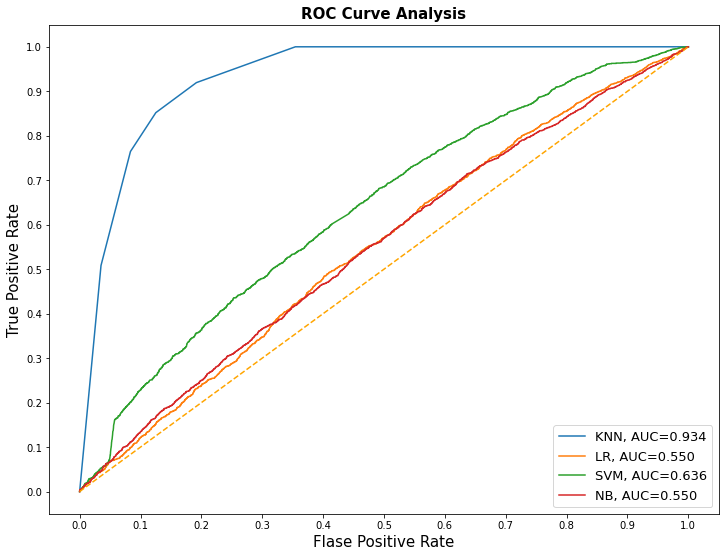

In [62]:
fig = plt.figure(figsize=(12, 9))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [63]:
# ROC AUC score
models['auc'] = [auc_knn, auc_lr, auc_svc, auc_nb]

In [64]:
# False Positive Rate
FPR_knn = FP_knn / (FP_knn + TN_knn)
FPR_lr = FP_lr / (FP_lr + TN_lr)
FPR_svc = FP_svc / (FP_svc + TN_svc)
FPR_nb = FP_nb / (FP_nb + TN_nb)

models['FPR'] = [FPR_knn, FPR_lr, FPR_svc, FPR_nb]

In [65]:
# False Negative Rate
FNR_knn = FN_knn / (TP_knn + FN_knn)
FNR_lr = FN_lr / (TP_lr + FN_lr)
FNR_svc = FN_svc / (TP_svc + FN_svc)
FNR_nb = FN_nb / (TP_nb + FN_nb)

models['FNR'] = [FNR_knn, FNR_lr, FNR_svc, FNR_nb]

In [66]:
# True Negative Rate
TNR_knn = TN_knn / (FP_knn + TN_knn)
TNR_lr = TN_lr / (FP_lr + TN_lr)
TNR_svc = TN_svc / (FP_svc + TN_svc)
TNR_nb = TN_nb / (FP_nb + TN_nb)

models['TNR'] = [TNR_knn, TNR_lr, TNR_svc, TNR_nb]

In [67]:
# Negative Predictive Value
NPV_knn = TN_knn / (FN_knn + TN_knn)
NPV_lr = TN_lr / (FN_lr + TN_lr)
NPV_svc = TN_svc / (FN_svc + TN_svc)
NPV_nb = TN_nb / (FN_nb + TN_nb)

models['NPV'] = [NPV_knn, NPV_lr, NPV_svc, NPV_nb]

In [68]:
from sklearn.metrics import log_loss

logloss_knn = log_loss(y_train, pred_knn)
logloss_lr = log_loss(y_train, pred_lr)
logloss_svc = log_loss(y_train, pred_svc)
logloss_nb = log_loss(y_train, pred_nb)

In [69]:
models['logloss'] = [logloss_knn, logloss_lr, logloss_svc, logloss_nb]
models

,model,Accuracy,PPV,TPR,F1,auc,FPR,FNR,TNR,NPV,logloss
0,KNN,0.863368,0.855007,0.874818,0.864799,0.934069,0.148060,0.125182,0.851940,0.872108,0.845794
1,Logistic Regression,0.535801,0.538150,0.498547,0.517592,0.550004,0.427017,0.501453,0.572983,0.533779,0.689130
2,SVM,0.592422,0.600930,0.547877,0.573178,0.635615,0.363120,0.452123,0.636880,0.585308,0.665945
3,Naive Bayes,0.531345,0.556574,0.303811,0.393064,0.549733,0.241570,0.696189,0.758430,0.521887,0.719137


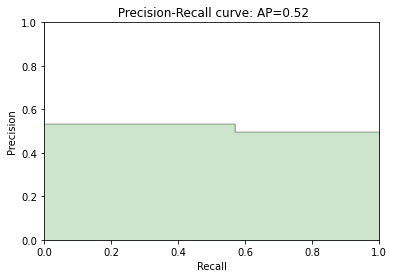

In [70]:
from inspect import signature

y_pred = clf.predict(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='black', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='green', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title(' Precision-Recall curve: AP={0:0.2f}'.format(average_precision));

## Conclusion.

First we studied the dataset, then we started to clean it up, did some feature engeneering, cleaned outliers, did factorizing where necessary. For easy visualization, several graphs were built. And finally, building models, the first model that we built was a decision tree, due to the fact that there is too much data, it turned out to be not entirely clear, but the graph was built. The next one is knn, its accuracy is 0.8915. And the last random forest has an accuracy of 0.8979, these models showed a very good result. We then started tunning, also using gridSearch to determine which parameters are the best. A tree was built with the 5 best parameters. And the last part of our project is evaluation metrics. We used knn, logistic, SVC, and Gaussian models. After that, the confussion matrix showed us the results of the prediction. We have created a table for convenience and good visualization, as well as a couple of graphs. This concludes our work, thank you for your attention!